## Caolan McDonagh - 21249929, Jan 2023
Assignment 1.

## Part 1

Below you will find a logistic regression implementation that follows the logic flow of:
- Input X amount of train data
- Init weights/biases to 0
- Loop over data for x iterations
- Inside said loop, calcuate cost (logloss, for tracking how well it the logistic regression is performing) and uses the sigmoid logistic function to map input data and the probability of the outcome in binary form (forward propagation).
- While still in the iteration, gradient descent is performed to adjust weights and biases with our learning rate (stochastic gradient descent).
- Training will complete upon covergence (through cost comparison) or when all iterations complete, from here we can use out test data to predict and measure performance.
- As this is binary classification, one output node only (1 or 0).

After this, we can split our data in to train/test, train our data with the train set which will result in a trained set of weights/biases and then make use of the predict method, which essentially carries out the forward propigation steps only (using the trained weights/biases), then updates reults to 1 or 0 for performance checks.

I did make use of a validation set here to tweak parameters (iterations + learning rate). By using this validation set and predicting with different iteration counts, learning rates I could tune in the optimal parameters while keeping the test data disconnected from the process. 

Note: References found at the end of the notebook.

In [11]:
# Part 1
#Logistic regression: Binary classifier

import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sb



class LogisticReg:

    #init, setting our "universal" variables such as weights/bias/iterations/learning rate.
    def __init__(self,iterations = 5000, learningRate= 0.01):
        
        #Takes in and sets user input parameters
        self.iterations = iterations
        self.learningRate = learningRate
        self.weights = None
        self.bias = None
    

    #Sigmoidal function
    def sigmoidFunc(self, X):
        return 1/(1 + np.exp(-X))

    #Log Loss function (Cost)
    def costFunc(self,y,y_hat ):
        #Using mean to get more legible data from the cost, rather than a list.
        return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()

    #Forward prop / SGD
    def training(self, X, y,threshold):
        
        samples,features = X.shape

        #init weights as zeros
        self.weights = np.zeros(features)
        self.bias = 0

        #Used for convergence checks later, needs to be init outside of loop.
        costLast = 0

        #loop over data up to x iterations or until convergence.
        for i in range(self.iterations):

            #Forward propagation
            y_hat = self.sigmoidFunc(np.dot(X, self.weights) +self.bias)

            #GD Cost functions
            delta_w = np.dot(X.T, (y_hat-y))
            delta_b = np.sum((y_hat-y))

            #Gradient descent updates
            self.weights -= self.learningRate * delta_w
            self.bias -= self.learningRate * delta_b

            #Get cost/loss
            cost = self.costFunc(y, y_hat) 

            #Convergence check, if last cost value is less than threshold it will break loop.
            costDiff = np.abs(cost - costLast)
            costLast = cost
            #print(costLast)
            if costDiff < threshold:    
                print('Break after iteration; ' + str(i) +'. Converging within threshold.')
                break
            

    #Predict method, which just performs the forward propagation on our test/valid data using trained weights and biases
    def predict(self, X):
        prediction = self.sigmoidFunc(np.dot(X, self.weights) + self.bias)
        #Return sigmoid value to nearest whole value (0 or 1)
        y = np.where( prediction > 0.5, 1, 0 ) 
        return y


## Part 2

Using the example file provided, the given dataset (moons500 or blobs400) are split into 3 groups: Train, test and validation @ 70%, 15% and 15% respectively.

As each dataset was tested, I noticed it had better results (averaging around 5-10% higher) with the "blobs400" set, which would make sense as this set is much more linearly seperable than "moons500" (Which when visualised is an almost spiral pattern between classes). This shows the limits of simple logistic regression, it can only create what is essentially a straight line between any two classes, which when the data is not linearly seperable, causes for poorer performance and results. That isn't to say it performed "poorly" on moons500, just consistently worse than blobs400.

Break after iteration; 589. Converging within threshold.
[[35  4]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.89      0.86      0.87        36

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



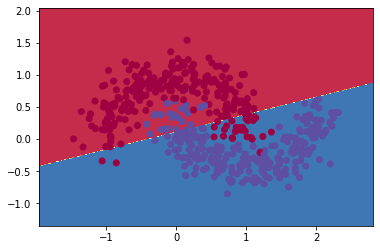

In [24]:
# Part 2

#comment/uncomment for chosen dataset and rerun for results:
df = pd.read_csv("moons500.csv")
#df = pd.read_csv("blobs400.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array

#Train and [test + validation]
X_train,x_t,y_train,y_t = train_test_split(X,y,train_size=0.7)
#Test and Validation split in half (e.g 15% each)
X_test,X_valid,y_test,y_valid = train_test_split(x_t,y_t,train_size=0.5)

#Tested learning rates on validation set, 0.001 returned the best accuracy returned from the classification report.
#Threshold of 0.00001 allowed for deeper convergence and better accuracy.


logisticRegression = LogisticReg(learningRate=0.001, iterations=10000)
#Can swap train/validation data here.
logisticRegression.training(X_train, y_train, threshold = 0.00001)

#('============Validation===========')
'''
#y_pred =logisticRegression.predict(X_valid)

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)
print(cnf_matrix)

targets = ['0', '1']
print(metrics.classification_report(y_valid, y_pred, target_names=targets))
'''
#('============Test===========')

y_pred =logisticRegression.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

classification = ['0', '1']
print(metrics.classification_report(y_test, y_pred, target_names=classification))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = logisticRegression.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
pyplot.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
pyplot.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


## Part 3

Below is the implementation of a shallow neural network which follows the below logic:
- Initilize weights/biases with respect to the size of the inputs and hidden node count.
- The shallow neural net (1 hidden layer) is effectively the logistic regression implementation from above, with the addition of another layer (the hidden layer), more neurons/nodes and backprop.
- Due to this, we have an additional set of weights/biases, one for the output and one for the new hidden layer.
- The same sigmoid function and cost function are used, with the addition of the sigmoid derivative which is to be used in the backpropagation to adjust weights/bias in our hidden layer during gradient descent.
- The steps remain the same up until we hit our iterative loop, where forward propagation takes place on both sets of weights, and the addition of the backpropigation stage for both sets.
- In our backpropigation, we are essentially transporting the loss measured in forward propigation back through the network.
- With this data, we adjust weights/biases accordingly, to tune in the training as optimally as possible.

With the additional layer, we should see the decision boundary change from a straight line in the logistic regression into a line that will adapt to split the different classes, more nodes = more adaption. Too many nodes could cause overfitting though, so this should be appropriately tested.

Accuracy averages >90% on blobs (up as far as 97% in my observed tests) and moons tends to hover just under 90%. Not a massive change from the logistic regression, but it is consistently higher. I assume the hidden network would benefit from a larger dataset.

In [25]:
#Part 3
#Shallow neural net (1 hidden layer)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

class shallowNN:

    #init
    def __init__(self,iterations = 5000, learningRate= 0.01, hiddenNodes = 4):
        
        self.samples,self.features = X.shape
        self.iterations = iterations
        self.learningRate = learningRate
        self.hiddenNodes = hiddenNodes

        #extra set of weights and bias, one for hidden and one for output layer.
        #set 1 = hidden, set 2 = output layers respectively.

        #setting to small random values to avoid hidden layer learning 
        # same function of input and small to prevent saturation from sigmoid. 
        self.w1 = np.random.randn(self.features,hiddenNodes) * 0.1 
        self.w2 = np.random.randn(self.hiddenNodes,1) * 0.1 
        self.b1 = np.zeros((1,hiddenNodes))#1 for output size, could be swapped for variable to allow for resizing of output nodes.
        self.b2 = np.zeros((1,1))
    

    #Sigmoidal function
    def sigmoidFunc(self, X):
        return np.clip(1/(1 + np.exp(-X)),0.0000000001, 1 - 0.0000000001) #Clipping due to overflow issues producing NaN

    #Derivative of sigmoid for backprop to minimize loss
    def sigmoidDerivative(self, y_hat):
        return np.clip(y_hat * (1 - y_hat),0.0000000001, 1 - 0.0000000001) 

    #Log Loss function [No change here as per notes]
    def costFunc(self,y,y_hat ):
        #Using mean to get more legible data from the cost, rather than a list.
        #return np.mean((-y * np.log(y_hat) - (1-y) * np.log(1-y_hat)))#.mean()
        return (y * np.log(y_hat) + (1-y) * np.log(1-y_hat)).mean()
    
    def nn(self, X, y,threshold):
        #Used for convergence checks later, needs to be init outside of loop.
        costLast = 0
        
        y = y.reshape(-1,1)

        for i in range(self.iterations):

            #Forward propagation

            activation = self.sigmoidFunc(np.dot(X, self.w1) +self.b1) #Hidden layer
            y_hat = self.sigmoidFunc(np.dot(activation, self.w2) +self.b2) #Output layer

            #Convergence check, if last cost value is less than threshold it will break loops.
            cost = self.costFunc(y, y_hat) 
            costDiff = np.abs(cost - costLast)
            costLast = cost
            #print(costDiff)
            if costDiff < threshold:    
                #print('Break after iteration; ' + str(i) +'. Converging within 0.00001.')
                
                break

            #Back propagation
            #"2" values denote the 2nd layer, the output layer, we start here and work back.
            delta_Activation2 = y_hat-y #error calculation
            dw2 = np.dot(activation.T, delta_Activation2) #gradient for weights
            db2 = np.sum(delta_Activation2) #gradient for biases

            #Same calculations for hidden layer, making use of backpropagated values from output layer.
            delta_Activation = np.dot(delta_Activation2, self.w2.T) * self.sigmoidDerivative(y_hat)
            dw1 = np.dot(X.T, delta_Activation)
            db1 = np.sum(delta_Activation)
                        
            #Gradient descent updates on weights/biases for both layers.
            self.w1 -= dw1 * self.learningRate
            self.b1 -= db1 * self.learningRate
            self.w2 -= dw2 * self.learningRate
            self.b2 -= db2 * self.learningRate
        
            #if epoch == epochs-1:
            #   print('Epoch loop finished.')

    #Predict method, which just performs the forward propagation on our test/valid data using trained weights and biases
    def predict(self, y):
        activation1 = self.sigmoidFunc(np.dot(y, self.w1) +self.b1)
        y_hat = self.sigmoidFunc(np.dot(activation1, self.w2) +self.b2)
        #print(y_hat)
        y = np.where( y_hat > 0.5, 1, 0 ) 
        return y

[[156  21]
 [ 18 155]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       177
           1       0.88      0.90      0.89       173

    accuracy                           0.89       350
   macro avg       0.89      0.89      0.89       350
weighted avg       0.89      0.89      0.89       350



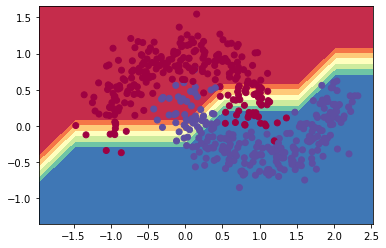

In [119]:
#comment/uncomment for chosen dataset

df = pd.read_csv("moons500.csv")
#df = pd.read_csv("blobs400.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array

#Train and test. (Can uncomment and use x_valid,y_valid for tweaking params)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.7)
#Test and Validation split in half (e.g 15% each)
#X_test,X_valid,y_test,y_valid = train_test_split(x_t,y_t,train_size=0.5)

#train
shallowNeuralNet = shallowNN(learningRate=0.0001, iterations=10000,hiddenNodes=6)
shallowNeuralNet.nn(x_train, y_train, threshold = 0.000001)

#test
y_pred =shallowNeuralNet.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

classification = ['0', '1']
print(metrics.classification_report(y_test, y_pred, target_names=classification))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = shallowNeuralNet.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
pyplot.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
pyplot.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [46]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.

(train_imgs, train_labels) = load_mnist('./fashion-mnist-data', 'train')

label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Shape of images is {train_imgs.shape}, labels is {train_labels.shape}")

def visualise(data, index):
    # MM Jan 2019: Given an MNIST data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (28x28).

    picture = data[index]
    
    # Initially, the data is a 1D array of 784 pixels; reshape it to a 2D array of 28x28 pixels
    picture.shape = (28,28) 
    
    # Display it
    plt.imshow(picture, cmap='gray')
    plt.show()


#visualise(train_imgs, 1)


Shape of images is (60000, 784), labels is (60000,)


# Part 4

The Fashion-Mnist has 10 classes, as per the assignment I am only interested in two, specifically Ankle boot + bag (8 and 9 in label form.)

For the purpose of binary classification, I use the prebuilt function to split into test/train. From here I get a new image/label shape by looping through data and appending the required data to a new list and convert to numpy array for future use.
The same logic is applied to filtering test/train, with the addition of updating the labels from 8/9 to 0/1. This results in 4 new lists/numpy arrays for train and test x/y.
While in these loops, I also normalise the data as it comes in. This is because the neural net cannot comprehend an image, it has to be a numerical set of values. The load_mnist results in train/test sets of an 764 (28x28 resolution) pixel values in black and white, which measures luminance from 0 (black) to 255 (White). Dividing said value in the loop by 255 adjusts this to a value between 0 and 1, which is perfectly suited for the neural net.

These new train/test sets can be fed into the same neural net as part 3.


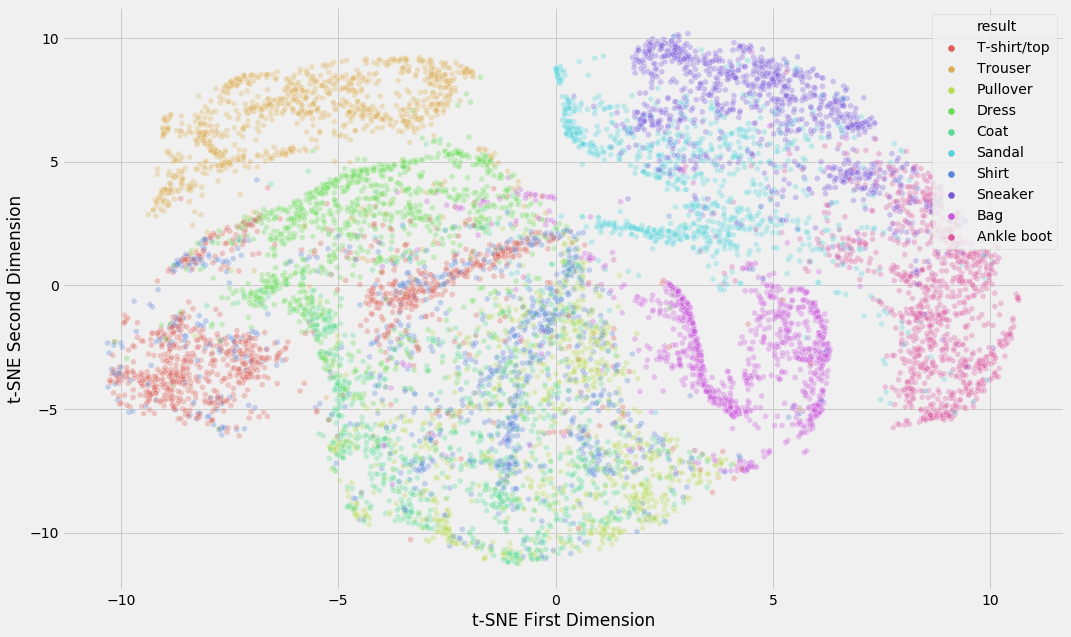
 - Visual produced from https://dax-cdn.cdn.appdomain.cloud/dax-fashion-mnist/1.0.2/data-preview/Part%201%20-%20Data%20Exploration.html

The reults were pretty great, averaging 95%+, often hitting 100% accuracy. It takes a bit longer run, but this was expected due to the scale of dataset compared to the smaller moons/blobs. 764 inputs is also substantially larger.

The above visualization of the Fashion-Mnist may show where the success is found. The Ankle Boot and Bag (Pink/purple on the right side of the image) are actually very seperable, compared to something like Shirt and Tshirt/top (blue and red) that have a lot of overlap. With 4 neurons/nodes the shallow neural network is able to pull them apart fairly easily. I also used less iterations/hiddenNodes than previously and it still had no issue in classifying.

In [47]:
#Part 4

#Transform image -> data that the NN can process.

x_train, y_train = load_mnist('./fashion-mnist-data', kind='train')
x_test, y_test = load_mnist('./fashion-mnist-data', kind='t10k')

#Images/Labels shape:
X=[]
y=[]
#You can change the val
for i in range(len(train_labels)):
    if train_labels[i] in [8,9]:
        X.append(train_imgs[i])
        y.append(train_labels[i])

X = np.array(X)
y = np.array(y)

#Classes: Ankle boot, Bag.
#Ankle boot = 0, bag = 1
#Filter data to just the above classes, e.g 8 and 9 for ankle boot and bag respectively.

x_train_filter = []
y_train_filter = []

#Grayscale images = 0-255 from black to white, divide by 255 to have each pixel represent 0-1 rather than 0-255. (normalise)
for i in range(len(y_train)):
    if y_train[i] in [8,9]:
        x_train_filter.append(x_train[i]/255)
        if y_train[i] == 8:
            y_train_filter.append(0)
        else:
            y_train_filter.append(1)

x_test_filter = []
y_test_filter = []

for i in range(len(y_test)):
    if y_test[i] in [8,9]:
        x_test_filter.append(x_test[i]/255)
        if y_test[i] == 8:
            y_test_filter.append(0)
        else:
            y_test_filter.append(1)

#List to numpy array
x_train_filter = np.array(x_train_filter)
y_train_filter = np.array(y_train_filter)
x_test_filter = np.array(x_test_filter)
y_test_filter = np.array(y_test_filter)

In [50]:

##Neural net feed:
#train
shallowNeuralNet = shallowNN(learningRate=0.0001, iterations= 4000, hiddenNodes=4)
shallowNeuralNet.nn(x_train_filter, y_train_filter, threshold = 0.000001)
#test
y_pred =shallowNeuralNet.predict(x_test_filter)

cnf_matrix = metrics.confusion_matrix(y_test_filter, y_pred)
print(cnf_matrix)

#Update 0/1 to appropriate class name.
classification = ['Ankle Boot', 'Bag']
print(metrics.classification_report(y_test_filter, y_pred, target_names=classification))

[[997   3]
 [  3 997]]
              precision    recall  f1-score   support

  Ankle Boot       1.00      1.00      1.00      1000
         Bag       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



ValueError: shapes (11615,2) and (784,4) not aligned: 2 (dim 1) != 784 (dim 0)

# Part 5

Deep Neural net (multiple hidden layers). This was ultimately a failure as I couldn't correctly implement the additional layers. Attempt made below used a user input array that held [nodes,nodes,nodes...] where each value was the number of nodes on the layer. Mini-batch gradient descent was also attempted as part of this, but I was not sure on how to correctly implemented this either.

In [11]:
#Part 5
#Classes: Ankle boot, Bag.

class deepNN:

    #init
    def __init__(self, learningRate= 0.00001, layers = []):
        
        self.samples,self.features = X.shape
        self.learningRate = learningRate
        self.weights = []
        self.biases = []

        #For use in mini-batch GD
        self.batch = np.arange(self.samples)

        #Layer init, pre-append the input layers, append the output layer.
        self.layers = layers.insert(0,self.features) #input data features as input layers
        self.layers = layers.append(1) #output layer. (1 output layer for binary classification)
        
        #init Weights and bias for each layer.
        for i in range(len(layers)-1): #Using i+1 to skip over input layer.
            weight = np.random.randn(layers[i+1], self.features) * 0.1 #weight
            bias = np.zeros((layers[i+1], 1)) * 0.1 #bias
            self.weights.append(weight)
            self.biases.append(bias)

    #Sigmoidal function
    def sigmoidFunc(self, X):
        return np.clip(1/(1 + np.exp(-X)),0.0000000001, 1 - 0.0000000001) #Clipping due to overflow issues producing NaN

    #Derivative of sigmoid for backprop to minimize loss
    def sigmoidDerivative(self, y_hat):
        return np.clip(y_hat * (1 - y_hat),0.0000000001, 1 - 0.0000000001) 

    #Log Loss function [No change here as per notes]
    def costFunc(self,y,y_hat ):
        #Using mean to get more legible data from the cost, rather than a list. (scalar value)
        return -(y * np.log(y_hat) + (1-y) * np.log(1-y_hat)).mean()
    
    def nn(self, X, y,threshold,epochs,batches):
        
        y = y.reshape(-1,1)

        #one epoch = one whole forward/back pass of entire training set
        for epoch in range(epochs):
            #Used for convergence checks later, needs to be init outside of loop.
            costLast = 0

            #Randomize data for batch
            np.random.shuffle(self.batch)

            #TODO: find range between self.samples and batches
            for i in range():
                batchLast = min(i + batches, self.samples)
                X_batch = X[self.batch[i:batchLast]]
                y_batch = y[self.batch[i:batchLast]]

                #Forward propagation

                activations = []
                y_hats = []
                for i in range(1,len(self.weights)):
                    activation = self.sigmoidFunc(np.dot(X_batch, self.weights[i]) +self.biases[i])
                    activations.append(activation)

                    y_hat = self.sigmoidFunc(np.dot(activation, self.weights[i]) +self.biases[i])
                    y_hats.append(y_hats)

                    return (activations, y_hats)

                #Convergence check, if last cost value is less than 0.0001 it will break loops, aka Threshold value.
                cost = self.costFunc(y_batch, y_hat) 
                costDiff = np.abs(cost - costLast)
                costLast = cost
                #print(cost)

                #Back propagation
                #TODO: Loop and figure out y_hats/Activations step through
                delta_Activation2 = y_hats[-1]-y_batch
                dweights = [np.dot(activations[-1].T, delta_Activation2)]
                dbbiases = [np.sum(delta_Activation)]

                delta_Activation = np.dot(delta_Activation2, dweights.T) * self.sigmoidDerivative(y_hats[-1])
                dweights.append(np.dot(X_batch.T, delta_Activation))
                dbbiases.append(np.sum(delta_Activation))
            
                #Gradient descent
                for i in range(1, len(self.weights)):
                    self.weights[i] -= dweights[i] * self.learningRate
                    self.biases[i] -= dbbiases[i] * self.learningRate
        
                if costDiff < threshold:
                    break

            #if costDiff < threshold:
            #    break
            
            if epoch == epochs-1:
                print('Epoch loop finished.')

    #predict based on trained weights and bias
    def predict(self, x):
        activation1 = self.sigmoidFunc(np.dot(x, self.weights) +self.biases)
        y_hat = self.sigmoidFunc(np.dot(activation1, self.weights) +self.biases)
        y = np.where( y_hat > 0.5, 1, 0 ) 
        return y

In [12]:
#using same train/test split from part 4.

##Neural net feed:

#array of layer paramaters:
layers = [6,4] #each new value is a new layer of x nodes, one layer = [6],  two layers = [6,4] and so on...
#So the above would provide paramaters for a NN of 2 layers, 6 and 4 nodes respectively.

#train
deepNeuralNet = deepNN(learningRate=0.00001, layers = layers)
deepNeuralNet.nn(x_train_filter, y_train_filter, threshold = 0.00001,epochs = 12,batches=64)
#test
y_pred =deepNeuralNet.predict(x_test_filter)
#y_test_filter = y_test_filter.reshape(-1,1)

cnf_matrix = metrics.confusion_matrix(y_test_filter, y_pred)
print(cnf_matrix)

classification = ['Ankle Boot', 'Bag']
print(metrics.classification_report(y_test_filter, y_pred, target_names=classification))

TypeError: range expected at least 1 argument, got 0

Improvements that could have been made:
- cost/loss for each epoch and batch and use an average between the two rather than one.
- On top of this, I believe using cost look ahead, e.g store data for the "best" cost batch/epoch and revert to that for final weight/bias values rather than cut off as soon as it converges as we could have passed the ultimately best version of our training.

References:
- CT5145 lecture notes/videos
- Sigmoid function: https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function
- Cost Function: https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/
- Forward/Back propagation: https://d2l.ai/chapter_multilayer-perceptrons/backprop.html
- scikit metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
- Derivatives(Sigmoid/LogLoss): https://towardsdatascience.com/derivative-of-sigmoid-and-cross-entropy-functions-5169525e6705
- Clipping sigmoid returns to remove excessivley small/large values: https://stackoverflow.com/questions/40726490/overflow-error-in-pythons-numpy-exp-function
- Fashion dataset info: https://github.com/zalandoresearch/fashion-mnist
- Fashion Mnist visual: https://dax-cdn.cdn.appdomain.cloud/dax-fashion-mnist/1.0.2/data-preview/Part%201%20-%20Data%20Exploration.html
- More on gradient descent: https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a
- Pands python info: https://pandas.pydata.org/docs/
- Numpy python info: https://numpy.org/doc/stable/
- High level shallow neural net explanation: https://medium.com/deeplearning-notepad/a-beginners-guide-to-shallow-neural-network-bde80c868ac9
- High level deep neural net explanation: https://www.upgrad.com/blog/neural-network-tutorial-step-by-step-guide-for-beginners/
- Activation functions cont...: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- Further info on NN 3Blue1Brown: https://www.youtube.com/watch?v=aircAruvnKk
- Linear Regression overview: https://medium.com/analytics-vidhya/logistic-regression-with-gradient-descent-explained-machine-learning-a9a12b38d710